In [2]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=3d2387a1d5538e6dfc5065532de4f01a1b70aa1759ad8c6f8d31f9343b9fa739
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [4]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [11]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [12]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [13]:
base.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [14]:
X = base.iloc[:,[1,25]].values

In [15]:
X.shape

(30000, 2)

In [16]:
X = base.iloc[:,[1,25]].values

In [17]:
X.shape

(30000, 2)

In [18]:
X.T.shape

(2, 30000)

In [19]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [20]:
r

(array([[ 175794.90323142,  491921.41663609],
        [ 308713.60465618, 1332262.2720398 ],
        [ 140102.41192301,   80564.80321726]]),
 array([[0.07016279, 0.01898468, 0.01813671, ..., 0.0575148 , 0.38188919,
         0.26317322],
        [0.00987796, 0.00245831, 0.00185369, ..., 0.00684967, 0.01926977,
         0.01726475],
        [0.91995925, 0.97855702, 0.9800096 , ..., 0.93563553, 0.59884104,
         0.71956203]]),
 array([[0.2787157 , 0.58353789, 0.42719818, ..., 0.41295104, 0.51853232,
         0.19508869],
        [0.53979253, 0.06771386, 0.07287337, ..., 0.11990818, 0.05533905,
         0.27115876],
        [0.18149176, 0.34874825, 0.49992846, ..., 0.46714078, 0.42612863,
         0.53375256]]),
 array([[ 508663.50217665,  478111.17037471,  399587.54040151, ...,
          445932.20964084,  244829.42496736,  289775.9676222 ],
        [1355658.57115375, 1328655.38209603, 1249893.92401597, ...,
         1292182.41695113, 1089918.59629739, 1131365.92445637],
        [ 140475

In [21]:
previsoes_porcentagem = r[1]

In [22]:
previsoes_porcentagem.shape

(3, 30000)

In [23]:
previsoes_porcentagem

array([[0.07016279, 0.01898468, 0.01813671, ..., 0.0575148 , 0.38188919,
        0.26317322],
       [0.00987796, 0.00245831, 0.00185369, ..., 0.00684967, 0.01926977,
        0.01726475],
       [0.91995925, 0.97855702, 0.9800096 , ..., 0.93563553, 0.59884104,
        0.71956203]])

In [24]:
previsoes_porcentagem[0][0]

0.07016278929364989

In [25]:
previsoes_porcentagem[1][0]

0.009877962010610966

In [27]:
previsoes_porcentagem[2][0]

0.9199592486957392

In [28]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [26]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [29]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [30]:
previsoes[5000]

2

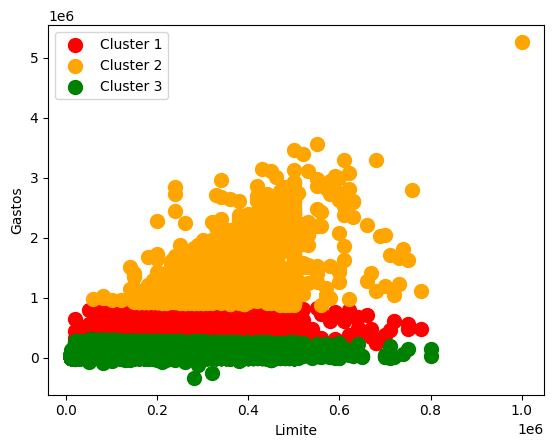

In [31]:
plt.scatter(X[previsoes ==0, 0], X[previsoes ==0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[previsoes ==1, 0], X[previsoes ==1, 1], s = 100, c= 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes ==2, 0], X[previsoes ==2, 1], s = 100, c= 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();